# 파이썬 머신러닝 완벽 가이드
<a href="https://github.com/wikibook/pymldg-rev"><img src="https://user-images.githubusercontent.com/48724872/223235545-161bab0b-f572-46db-8019-fbf7414b828e.jpg" width="400" align = "right"></a>


## Chapter 3. 평가
### 1.  [정확도(Accuracy)](#1.-정확도(Accuracy))    

### 2.  [오차행렬(Confusion Matrix)](#2.-오차행렬(Confusion-Matrix))

### 3.  [정밀도(Precision)와 재현율(Recall)](#3.-정밀도(Precision)와-재현율(Recall))
  * [정밀도/재현율 트레이드오프](#정밀도/재현율-트레이드오프)
  * [정밀도와 재현율의 맹점](#정밀도와-재현율의-맹점)

### 4.  [F1 스코어](#4.-F1-스코어)

### 5.  [ROC 곡선과 AUC](#5.-ROC-곡선과-AUC)

### 6.  [피마 인디언 당뇨병 예측](#6.-피마-인디언-당뇨병-예측)
  ***

* **회귀 모델**
    + 실제 값과 예측 값의 오차 평균값에 기반한다.
    + 오차에 절대값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 평균 오차를 구하는 방법을 사용한다


* **분류 모델**
    + 정확도(Accuracy)
    + 오차행렬(Confusion Matrix)
    + 정밀도(Precision)
    + 재현율(Recall)
    + F1 스코어
    + ROC AUC

# 1. 정확도(Accuracy)

$$정확도(Accuracy) = \frac{예측\ 결과가\ 동일한\ 데이터\ 건수}{전체\ 예측\ 데이터\ 건수}$$

* 정확도(Accuracy)는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우에는 적합하지 않다

In [14]:
import numpy as np
from sklearn.base import BaseEstimator

# BaseEstimator를 상속받아  Customized 형태의 MyDummyClassifier 클래스를 만든다
class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않는다
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [15]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./dataset/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

# 단순히 여성(sex=0)이면 생존, 남성(sex=1)이면 사망이라고 예측하면 정확도가 78.77%이다

Dummy Classifier의 정확도는: 0.7877


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

# BaseEstimator를 상속받아  Customized 형태의 MyFakeClassifier 클래스를 만든다
class MyFakeClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [18]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

# 단순히 0으로만 예측하면 정확도가 90%이다

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


# 2. 오차행렬(Confusion Matrix)

* 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표
* 이진 분류의 예측 오류가 얼마인지와 더불어 어떤한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

<img src=./img/confusion_matrix_img.jpg width=600>

* TN(True Negative)는 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0
* FP(False Positive)는 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
* FN(False Negative)는 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
* TP(True Positive)는 예측값을 Positive 값 1로 예측했고, 실제 값 역시 Positive 값 1

In [19]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

<AxesSubplot: >

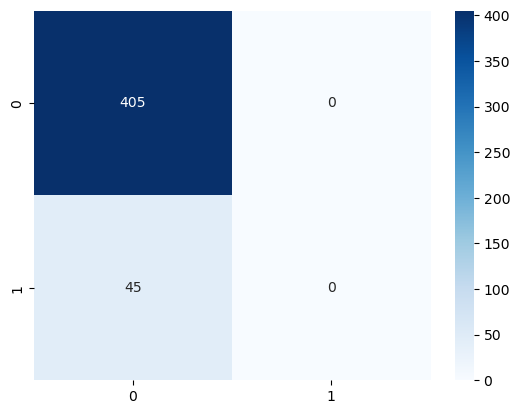

In [20]:
# Confusion Matrix 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, fakepred), annot = True, fmt=".0f", cmap='Blues')

<img src=./img/confusion_matrix_img_2.jpg width=800>

$$정확도 = \frac{예측\ 결과와\ 실제\ 값이\ 동일한\ 건수}{전체\ 데이터\ 수} = \frac{TN + TP}{TN + FP + FN + TP} = \frac{405 + 0}{405 + 0 + 45 + 0} = 0.9$$

* 정확도는 분류(Classification) 모델의 성능을 측정할 수 있는 한 가지 요소일 뿐, 불균형한 데이터 세트에서 정확도만으로는 모델 실뢰도가 떨어질 수 있다
* 불균형한 데이터 세트에서 정확도보다 정밀도(Precision)와 재현률(Recall)이 더 선호되는 평가지표이다

# 3. 정밀도(Precision)와 재현율(Recall)

* **정밀도(Precision)**

    $$정밀도=\frac{TP}{FP + TP}$$

    예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    
    정밀도가 상대적으로 더 중요한 지표의 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    


* **재현율(Recall)**

    $$재현율=\frac{TP}{FN + TP}$$

    실제값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    
    재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative 음성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    


In [21]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)    # 오차행렬(confusion_matrix)
    accuracy = accuracy_score(y_test , pred)       # 정확도(accuracy_score)
    precision = precision_score(y_test , pred)     # 정밀도(precision_score)
    recall = recall_score(y_test , pred)           # 재현율(recall_score)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./dataset/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

# 평가지표를 출력
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


### 정밀도/재현율 트레이드오프

* 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 하는 경우 분류의 결정 임곗값(Threshold)을 조정한다
* 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다

In [23]:
# 'predict_proba()'
# 학습이 안료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 
# 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다

pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46208787 0.53791213]
 [0.87861827 0.12138173]
 [0.87710724 0.12289276]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46208787 0.53791213 1.        ]
 [0.87861827 0.12138173 0.        ]
 [0.87710724 0.12289276 0.        ]]


In [24]:
# 'Binarizer'
# 입력된 넘파이 ndarray의 값을 지정된 threshold보다 같거나 작으면 0, 크면 1로 반환한다

from sklearn.preprocessing import Binarizer

X = [[ 1,   -1,   2],
     [ 2,    0,   0],
     [ 0,  1.1, 1.2]]

# threshold(임계) 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [25]:
# 분류 경정 임계값 0.5 기반에서 Binarizer을 이용해 예측값 변환

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 // Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


<AxesSubplot: >

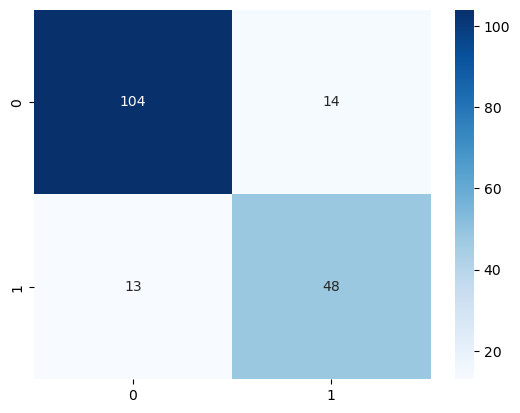

In [26]:
# Confusion Matrix 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, custom_predict), annot = True, fmt=".0f", cmap='Blues')

In [27]:
# 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


<AxesSubplot: >

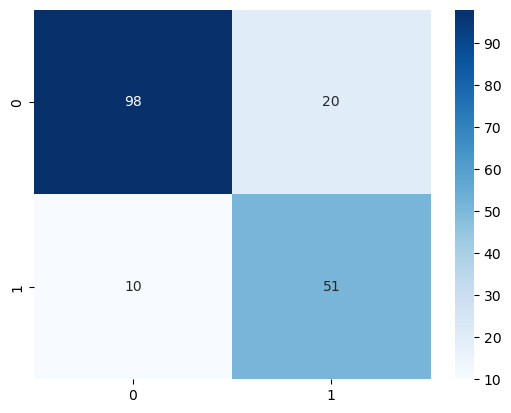

In [28]:
# Confusion Matrix 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, custom_predict), annot = True, fmt=".0f", cmap='Blues')

<img src=./img/confusion_matrix_img_3.jpg width=900>

* 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다
* 확률이 0.5가 아닌 0.4부터 Positive로 예측을 하게되면 True 값이 많아지게 된다
* TP가 47에서 50으로 늘어나고 FN이 14에서 11로 줄었다 &rarr; 재현율이 0.770에서 0.820으로 향상
* TP가 47에서 50으로 늘어나고 FP도 10에서 21로 늘었다 &rarr; 정밀도가 0.825에서 0.704로 저하 

In [29]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


<img src=./img/evaluation_img.jpg width=800>

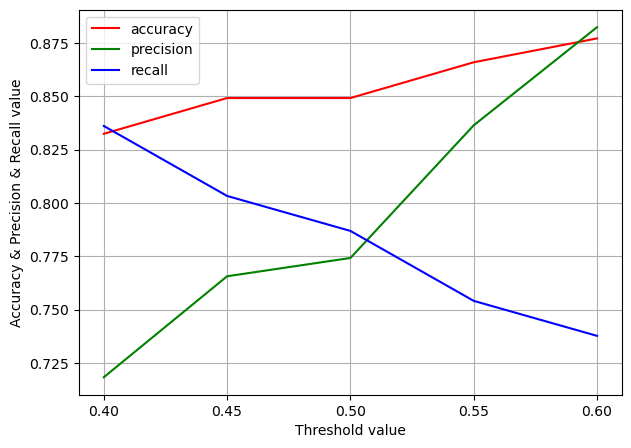

In [30]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
accuracy_plot = []
precision_plot = []
recall_plot = []

def get_clf_eval_plot(y_test , pred):
    accuracy = accuracy_score(y_test , pred)       # 정확도(accuracy_score)
    precision = precision_score(y_test , pred)     # 정밀도(precision_score)
    recall = recall_score(y_test , pred)           # 재현율(recall_score)
    
    accuracy_plot.append(accuracy)
    precision_plot.append(precision)
    recall_plot.append(recall)

def get_eval_by_threshold_plot(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval_plot(y_test, custom_predict)
    
    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, accuracy_plot, label='accuracy', c='r')
    plt.plot(thresholds, precision_plot, label='precision', c='g')
    plt.plot(thresholds, recall_plot, label='recall', c='b')
    plt.xlabel('Threshold value'); plt.ylabel('Accuracy & Precision & Recall value')
    plt.xticks(np.round(np.arange(0.4, 0.65, 0.05),2))
    plt.grid()
    plt.legend(loc='best')
    plt.show()
        

get_eval_by_threshold_plot(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)

In [31]:
# 'precision_recall_curve()'
# 일반적으로 0.11 ~ 0.95 정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)
thresholds 5 sample: [0.10397379 0.10397604 0.10400125 0.10786876 0.10894804]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


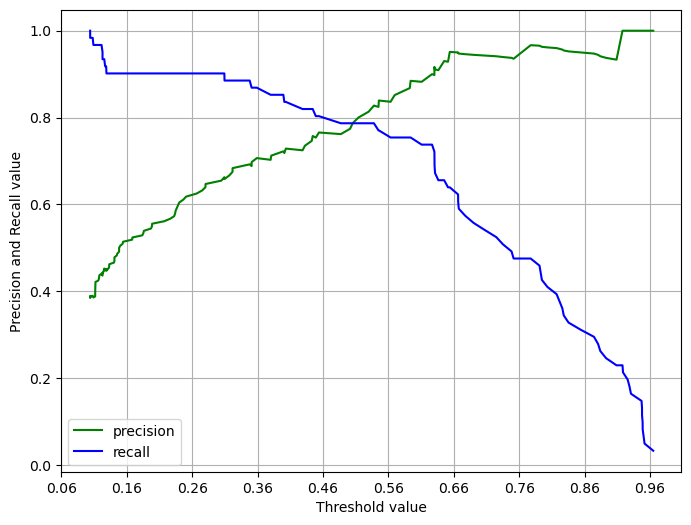

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], label='precision', c='g')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall', c='b')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

### 정밀도와 재현율의 맹점

* 정밀도가 100%가 되는 방법

    확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다

* 재현율이 100%가 되는 방법

    모든 경우를 Positive로 예측한다

# 4. F1 스코어

* F1 스코어(Score)

    $$F1=\frac{2}{\frac{1}{recall}+\frac{1}{precision}}=2\times \frac{precision\times recall}{precision + recall}$$

    정밀도와 재현율을 결합한 지표

In [33]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [34]:

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    
    print('오차 행렬')
    print(confusion)
    
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


<img src=./img/evaluation_img_2.jpg width=800>

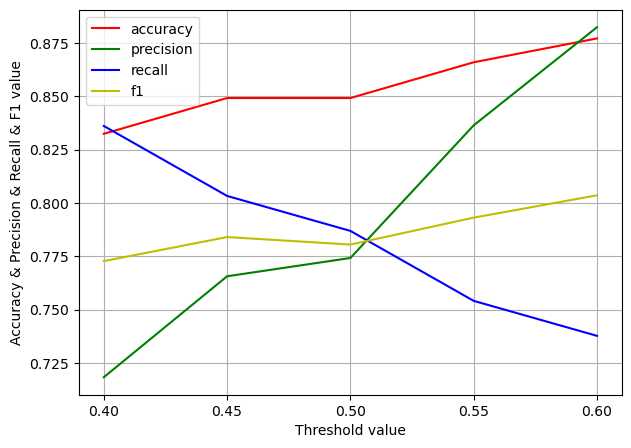

In [35]:
accuracy_plot = []
precision_plot = []
recall_plot = []
f1_plot = []

def get_clf_eval_plot(y_test , pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    accuracy_plot.append(accuracy)
    precision_plot.append(precision)
    recall_plot.append(recall)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    f1_plot.append(f1)
    
def get_eval_by_threshold_plot(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval_plot(y_test, custom_predict)
    
    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, accuracy_plot, label='accuracy', c='r')
    plt.plot(thresholds, precision_plot, label='precision', c='g')
    plt.plot(thresholds, recall_plot, label='recall', c='b')
    plt.plot(thresholds, f1_plot, label='f1', c='y')
    plt.xlabel('Threshold value'); plt.ylabel('Accuracy & Precision & Recall & F1 value')
    plt.xticks(np.round(np.arange(0.4, 0.65, 0.05),2))
    plt.grid()
    plt.legend(loc='best')
    plt.show()

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold_plot(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 5. ROC 곡선과 AUC

* ROC 곡선(Receiver Operation Characteristic Curve)

    수신자 판단 곡선으로 FPR(False Positive Rate)이 변할 때 TPR(True Positice Rate)가 어떻게 변하는지 나타내는 곡선
    
    - 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타낸다
    
    - 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다

In [36]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


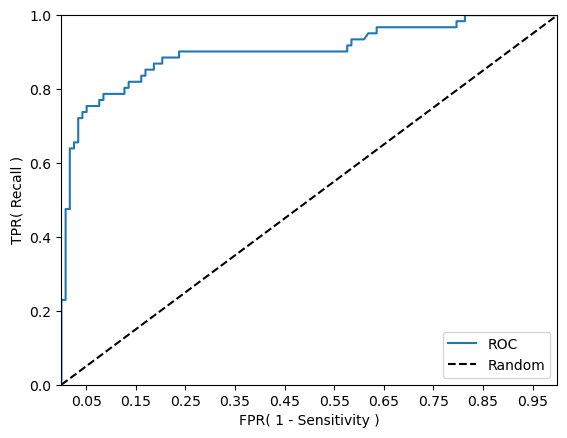

In [37]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [38]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [39]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print(end="\n")

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727, AUC:0.8333

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840, AUC:0.8381

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805, AUC:0.8341

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931, AUC:0.8389

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036, AUC:0.8434



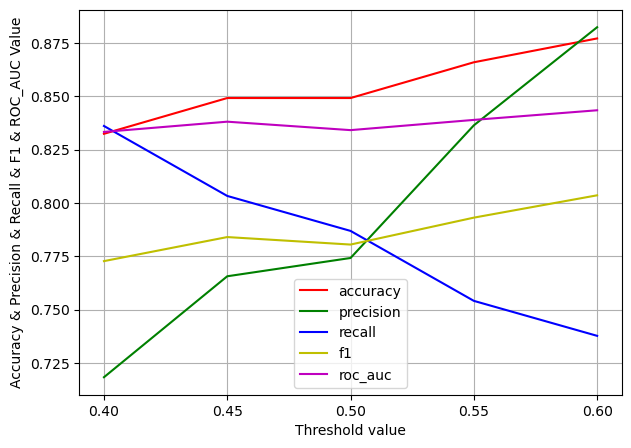

In [40]:
accuracy_plot = []
precision_plot = []
recall_plot = []
f1_plot = []
roc_auc_plot = []

def get_clf_eval_plot(y_test , pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    accuracy_plot.append(accuracy)
    precision_plot.append(precision)
    recall_plot.append(recall)
    f1_plot.append(f1)
    
    # ROC 곡선 추가
    roc_auc = roc_auc_score(y_test, pred)
    roc_auc_plot.append(roc_auc)
    
def get_eval_by_threshold_plot(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval_plot(y_test, custom_predict, pred_proba_c1)
    
    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, accuracy_plot, label='accuracy', c='r')
    plt.plot(thresholds, precision_plot, label='precision', c='g')
    plt.plot(thresholds, recall_plot, label='recall', c='b')
    plt.plot(thresholds, f1_plot, label='f1', c='y')
    plt.plot(thresholds, roc_auc_plot, label='roc_auc', c='m')
    plt.xlabel('Threshold value'); plt.ylabel('Accuracy & Precision & Recall & F1 & ROC_AUC Value')
    plt.xticks(np.round(np.arange(0.4, 0.65, 0.05),2))
    plt.grid()
    plt.legend(loc='best')
    plt.show()

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold_plot(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 6. 피마 인디언 당뇨병 예측

* **Pregnancies** : 임신 횟수
* **Glucose** : 포도당 부하 검사 수치
* **BloodPressure** : 혈압(mmHg)
* **SkinThickness** : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* **Insulin** : 혈청 인슐린(mu U/ml)
* **BMI** : 체질량지수(체중(kg)/(키(m))^2)
* **DiabetesPedigreeFunction** : 당뇨 내력 가중치 값
* **Age** : 나이
* **Outcome** : 클래스 결정 값(0 또는 1)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./dataset/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [45]:
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [47]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [48]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습,예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

# 전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 조금 더 초점을 맞춘다

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC:0.7313


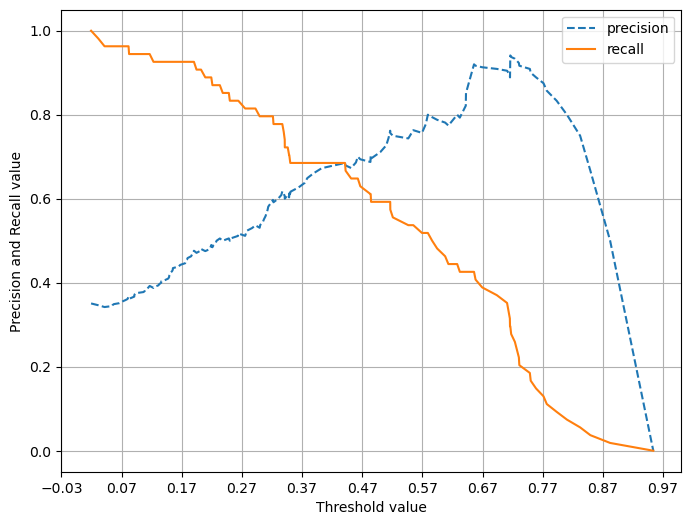

In [49]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [50]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


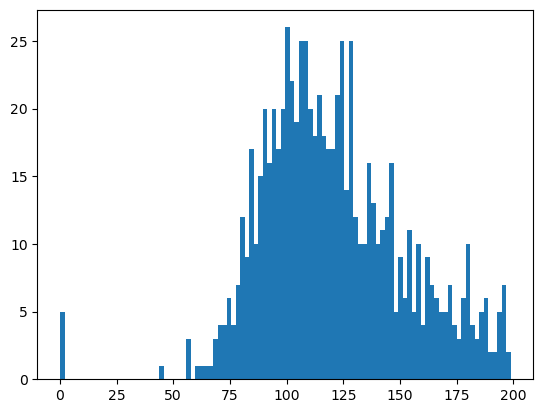

In [51]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [52]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [53]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [54]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.7556


In [55]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print(end='\n')

In [56]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC:0.7331

임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC:0.7489

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC:0.7411

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC:0.7419

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC:0.7533

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC:0.7583

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.7641

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.7556



<img src=./img/evaluation_img_3.jpg width=800>

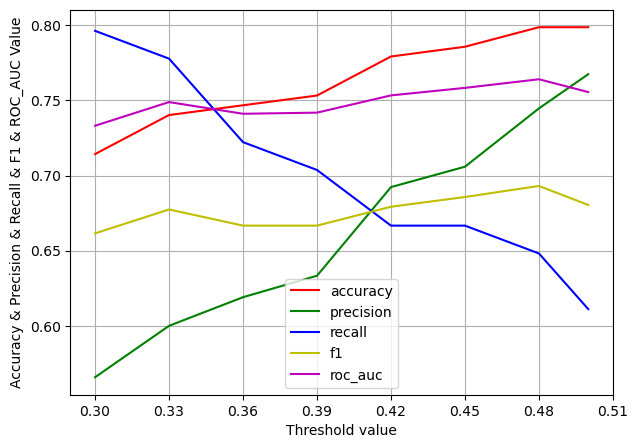

In [57]:
from sklearn.preprocessing import Binarizer

accuracy_plot = []
precision_plot = []
recall_plot = []
f1_plot = []
roc_auc_plot = []

def get_clf_eval_plot(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    accuracy_plot.append(accuracy)
    precision_plot.append(precision)
    recall_plot.append(recall)
    f1_plot.append(f1)
    roc_auc_plot.append(roc_auc)
    
def get_eval_by_threshold_plot(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval_plot(y_test , custom_predict, pred_proba_c1)
        
    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, accuracy_plot, label='accuracy', c='r')
    plt.plot(thresholds, precision_plot, label='precision', c='g')
    plt.plot(thresholds, recall_plot, label='recall', c='b')
    plt.plot(thresholds, f1_plot, label='f1', c='y')
    plt.plot(thresholds, roc_auc_plot, label='roc_auc', c='m')
    plt.xlabel('Threshold value'); plt.ylabel('Accuracy & Precision & Recall & F1 & ROC_AUC Value')
    plt.xticks(np.round(np.arange(0.3, 0.51, 0.03),2))
    plt.grid()
    plt.legend(loc='best')
    plt.show()
    
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold_plot(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

In [58]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.7641
